# Exercise 6.04 - Linear regression analysis for MOTOGP project

SUMMARY:

Step 0. Best File for Linear Regression analysis: circuit_data.csv. This file contains clear numerical variables (like "Length in meters" and "Longest Straight") that can be used to test linear relationships.

Step 1. Data Cleaning: Check for missing values and converted "Width in meters" to numeric. No missing values remain after cleaning.

Step 2. Visual Exploration: the scatter plot of "Length in meters" vs "Longest Straight" shows a positive trend, suggesting a possible linear relationship.

Step 3. Hypothesis: There is a linear relationship between the total length of a circuit and its longest straight segment.

Step 4. Prepare Variables: X (independent): Length in meters / y (dependent): Longest Straight

Step 5. Split Data: Data split into training and test sets (80/20 split).

Step 6. Run Linear Regression Model fitted to training data and used to predict on test data.

Step 7. Plot Regression Line: the regression line (red) is plotted over the test data (blue dots). The fit is moderate, with some scatter around the line.

Step 8. Model Performance:
Mean Squared Error (MSE): 142,023 / R² Score: 0.36
This means about 36% of the variance in "Longest Straight" is explained by "Length in meters".

Step 9. Predicted vs. Actual Values (Sample from comparison data-frame below):	
Actual: 960 - 607 - 1120 - 1068 - 800
Predicted: 745.19 - 900.19 - 1160.94 - 1082.29 - 779.66

Step 10. Interpretation and Reflections: the model shows a moderate linear relationship: the regression line fits the general trend, but there is substantial scatter. Some circuits have much longer straights than predicted by their overall length, and vice versa.

## 1 - Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Define paths:
path1='/home/haus/Scrivania/Exercise_6/Exercise_6.04/01_Original_Data'  # Original data path
path2='/home/haus/Scrivania/Exercise_6/Exercise_6.04/02_Prepared_Data'  # Prepared data path
path3='/home/haus/Scrivania/Exercise_6/Exercise_6.04/03_Visualisations'  # Visuals path

In [4]:
# Step 0: Load the data (circuit_data.csv)
data = pd.read_csv(f"{path1}/circuit_data.csv")

## Step 1: Clean the data

In [9]:
# Convert 'Width in meters' to numeric
data['Width in meters'] = pd.to_numeric(data['Width in meters'])

In [11]:
# Remove rows with missing values to ensure clean analysis
data_clean = data.dropna()

In [13]:
# Save cleaned data
data_clean.to_csv(f"{path2}/circuit_data_cleaned.csv", index=False)

## Step 2: Exploratory visualization - create scatterplot to see relationship

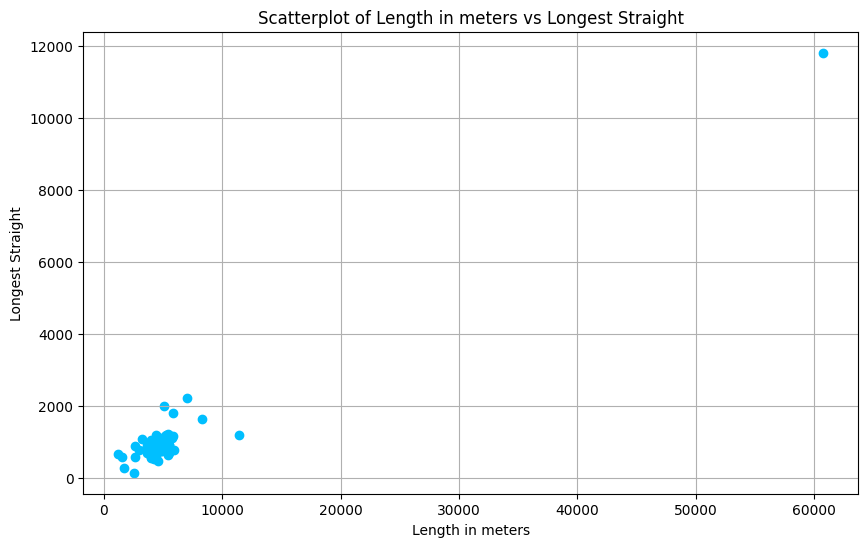

In [19]:
# Step 2: Exploratory visualization - create scatterplot to see relationship
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['Length in meters'], data_clean['Longest Straight'], color='deepskyblue')
plt.title('Scatterplot of Length in meters vs Longest Straight')
plt.xlabel('Length in meters')
plt.ylabel('Longest Straight')
plt.grid(True)
plt.show()
plt.savefig(f"{path3}/scatterplot_length_vs_straight.png")
plt.close()

## Step 3: Hypothesis
## Hypothesis: There is a positive linear relationship between circuit length and longest straight length

## Step 4: Prepare variables for regression

In [23]:
X = data_clean[['Length in meters']]  # Independent variable
y = data_clean['Longest Straight']    # Dependent variable

In [25]:
# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Train linear regression model

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)  # Fit model to training data

LinearRegression()

In [44]:
# Make predictions on test set
y_predicted = model.predict(X_test)

## Step 6: Create regression line plot on test data

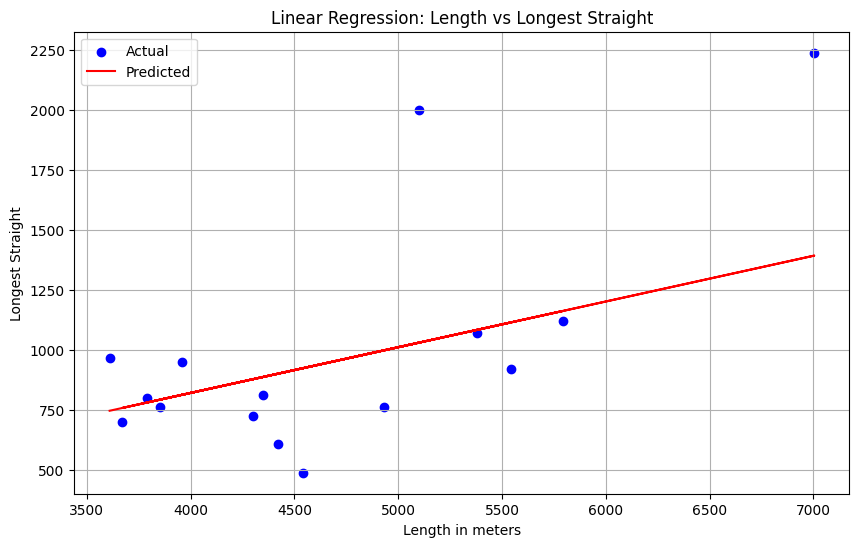

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Length vs Longest Straight')
plt.xlabel('Length in meters')
plt.ylabel('Longest Straight')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(f"{path3}/regression_line_plot.png")
plt.close()

## Step 7 - Plot Regression Line
The regression line (red) is plotted over the test data (blue dots). The fit is moderate, with some scatter around the line.

## Step 8: Calculate model performance metrics

In [52]:
# Step 8: Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 142022.64
R² Score: 0.36


## Step 9: Compare actual vs predicted values

In [112]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample comparison of actual vs predicted values:")
print(comparison_df.head(10))


Sample comparison of actual vs predicted values:
    Actual    Predicted
22     966   745.192107
0      607   900.027450
49    1120  1160.943097
4     1068  1082.287504
55     800   779.663444
18     920  1113.330753
10     487   922.690926
33     762   791.852204
46    2237  1391.577292
12     810   885.743747


In [116]:
# Save comparison for further analysis
comparison_df.to_csv(f"{path2}/actual_vs_predicted.csv", index=False)

## Step 10: Create residual plot to examine model bias

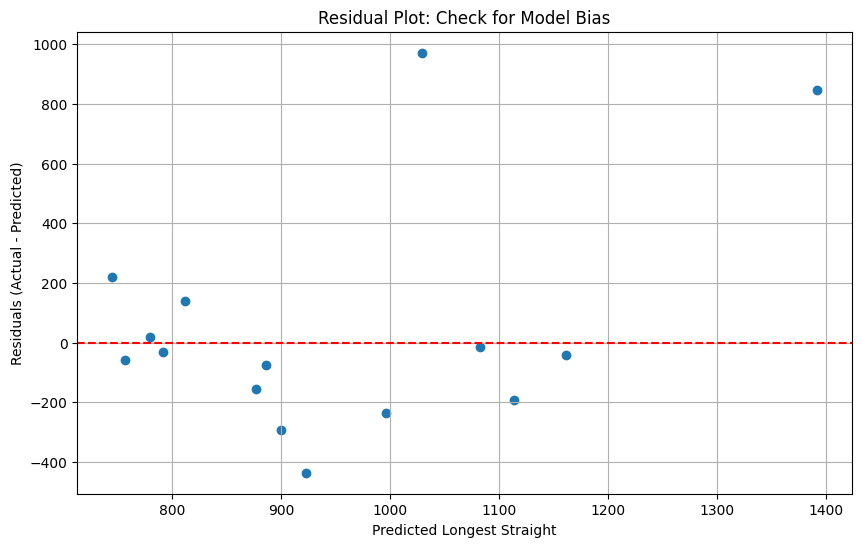


Linear regression analysis complete!


In [34]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot: Check for Model Bias')
plt.xlabel('Predicted Longest Straight')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()
plt.savefig(f"{path3}/residual_plot.png")
plt.close()

print("\nLinear regression analysis complete!")

# Close